<a href="https://colab.research.google.com/github/musiur/preprocess_salary_dataset/blob/main/data-cleaning-salary-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Try setting error_bad_lines=False to skip bad lines
df = pd.read_csv('job_descriptions.csv', engine="python", on_bad_lines='warn')

# Print the column names to check if 'description' exists and if not what the correct name is
print(df.columns)

# Assuming the column is named 'job_description' based on the provided global variables
# salary_range_count = df['job_description'].str.contains(r'\$\d+,\d+ - \$\d+,\d+|\$\d+ - \$\d+').sum()

# print(f"Number of tuples with salary range: {salary_range_count}")


Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')


In [4]:
df.shape

(103962, 23)

In [5]:
print(df.describe())

             Job Id       latitude      longitude   Company Size
count  1.039620e+05  103962.000000  103962.000000  103961.000000
mean   1.548761e+15      19.295946      16.351818   73708.508017
std    8.965730e+14      23.583259      70.903894   35304.220838
min    1.817948e+11     -40.900600    -175.198200   12646.000000
25%    7.685800e+14       4.860400     -15.310100   42909.000000
50%    1.551385e+15      18.042500      19.374400   73618.000000
75%    2.321912e+15      39.074200      48.516400  104371.000000
max    3.099561e+15      71.706900     178.065000  134834.000000


In [6]:
print(len(df))

103962


In [8]:
df.tail()


,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
103957,238086201272145,1 to 9 Years,BA,$64K-$124K,Manama,Bahrain,26.0667,50.5577,Contract,25449.0,...,(922)488-8186x4349,Software Tester,Automation Tester,USAJOBS,An Automation Tester uses automated testing to...,"{'Transportation Benefits, Professional Develo...","Test automation tools (e.g., Selenium, Appium)...",Implement and maintain test automation framewo...,Eastman Chemical,"{""Sector"":""Chemicals"",""Industry"":""Chemicals"",""..."
103958,469166369709,4 to 11 Years,M.Tech,$64K-$98K,Kingstown,St. Vincent and the Grenadines,12.9843,-61.2872,Contract,100420.0,...,891-834-6272x627,Key Account Manager,Strategic Account Manager,Dice,Strategic Account Managers nurture relationshi...,"{'Transportation Benefits, Professional Develo...",Account management Client relationship Sales s...,"Focus on strategic planning for key accounts, ...",Adani Enterprises,"{""Sector"":""Conglomerate"",""Industry"":""Conglomer..."
103959,755769123082209,5 to 8 Years,M.Tech,$62K-$88K,Santiago,Chile,-35.6751,-71.5429,Intern,16620.0,...,(832)450-8180x0963,Supply Chain Manager,Demand Planner,Idealist,A Demand Planner analyzes historical sales dat...,"{'Employee Assistance Programs (EAP), Tuition ...",Demand forecasting Inventory management Data a...,Analyze demand patterns and market trends to f...,The Coca-Cola Company,"{""Sector"":""Food and Beverage"",""Industry"":""Beve..."
103960,1950208792290670,4 to 8 Years,PhD,$59K-$86K,Manama,Bahrain,26.0667,50.5577,Contract,59842.0,...,(267)577-8366x5871,Electrical Engineer,Controls Engineer,Idealist,Controls Engineers specialize in industrial au...,"{'Casual Dress Code, Social and Recreational A...",Control system design PLC programming Automati...,Design and implement control systems for indus...,Keurig Dr Pepper Inc.,"{""Sector"":""Beverage"",""Industry"":""Food and Beve..."
103961,2341938800473327,4 to 15 Years,BBA,$60K-$117K,Roseau,Dominica,15.4149,-61.3705,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None


In [9]:
df.shape

(103962, 23)

Data Clening


In [10]:
df.isnull()

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103957,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
103960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

,0
Job Id,0
Experience,0
Qualifications,0
Salary Range,0
location,0
Country,0
latitude,0
longitude,0
Work Type,1
Company Size,1


In [12]:
df.isnull().sum().sum()

373

In [13]:
df.shape

(103962, 23)

In [14]:
df=df.dropna()

In [15]:
df.shape

(103603, 23)

In [ ]:
df.isnull().sum()

,0
Job Id,0
Experience,0
Qualifications,0
Salary Range,0
location,0
Country,0
latitude,0
longitude,0
Work Type,0
Company Size,0


duplicates

In [16]:
df[df.duplicated()]

,Job Id,Experience,Qualifications,Salary Range,location,Country,latitude,longitude,Work Type,Company Size,...,Contact,Job Title,Role,Job Portal,Job Description,Benefits,skills,Responsibilities,Company,Company Profile


In [ ]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

Outliers


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Experience'>

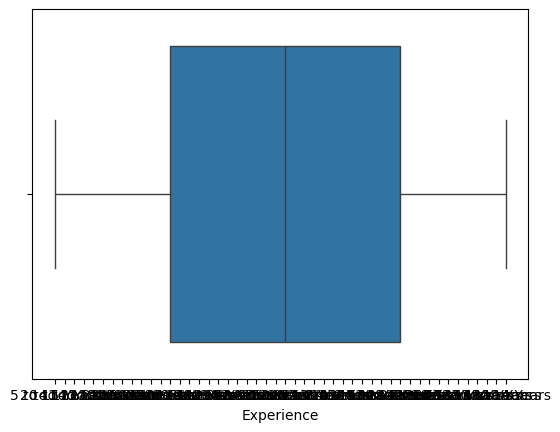

In [18]:
import seaborn as sns
sns.boxplot(x=df['Experience'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Qualifications'>

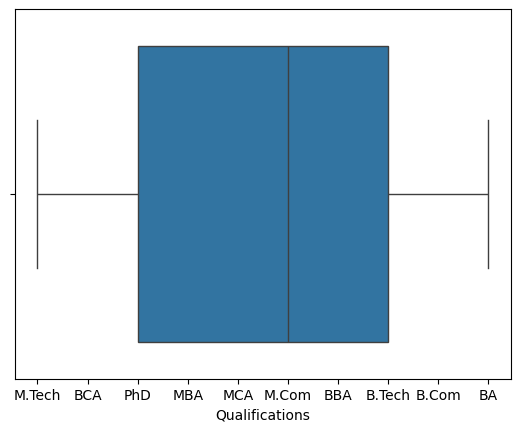

In [21]:

sns.boxplot(x=df['Qualifications'])


In [ ]:
df.columns

Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')

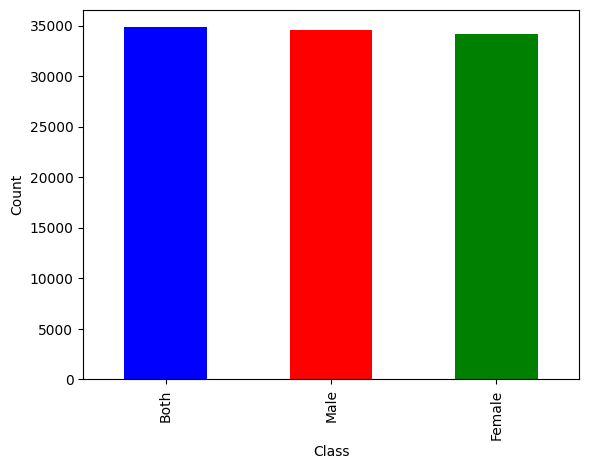

In [22]:
import matplotlib.pyplot as plt

df['Preference'].value_counts().plot(kind='bar', color=['blue', 'red', 'green'])
# plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()